# **CVPS20 // Filtering Data in 1- and 2-Dimensions**

*September 22, 2020*

This notebook intoduces concepts of convolution and cross-correlation of data in multiple dimensions.

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio as iio

In [2]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (8, 5)

Let's make a step function to see the results of various filter types,

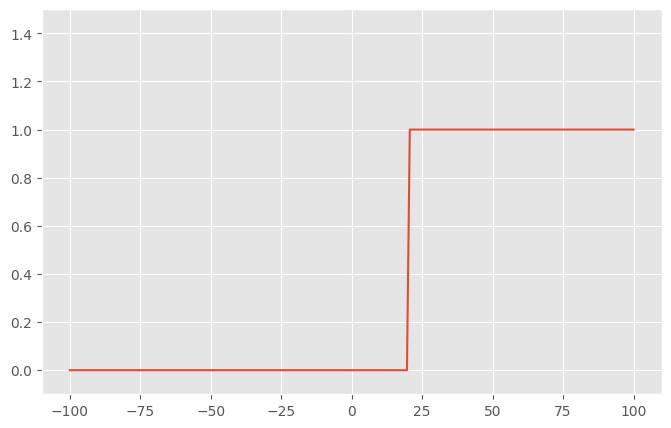

In [3]:
# -- generate a step function
xx = np.linspace(-100., 100., 200)
yy = 1.0 * (xx > 20.)

# -- plot it
fig, ax = plt.subplots()
ax.plot(xx, yy)
ax.set_ylim(-0.1, 1.5)
fig.show()

### Top-hat vs Gaussian Filters

SciPy has useful canned routines for many different kinds of [filters](https://docs.scipy.org/doc/scipy/reference/ndimage.html#filters), which have different effects depending upon the filter shape,

In [4]:
from scipy.ndimage import uniform_filter as uf
from scipy.ndimage import gaussian_filter as gf

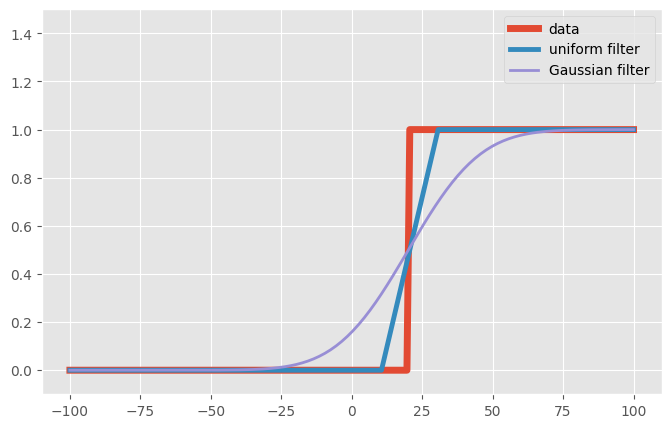

In [5]:
# -- plot uniform and Gaussian filters of the same width
wid = 20

fig, ax = plt.subplots()
ax.plot(xx, yy, lw=5, label='data')
ax.plot(xx, uf(yy, wid), lw=3.5, label='uniform filter')
ax.plot(xx, gf(yy, wid), lw=2, label='Gaussian filter')
ax.set_ylim(-0.1, 1.5)
ax.legend()
fig.show()

Notice that the **width** of the filter is expressed in **sample units**.

In [ ]:
# -- plot Gaussian filters of the varying width


Let's define a noisy step function to see the effect of filtering on noise,

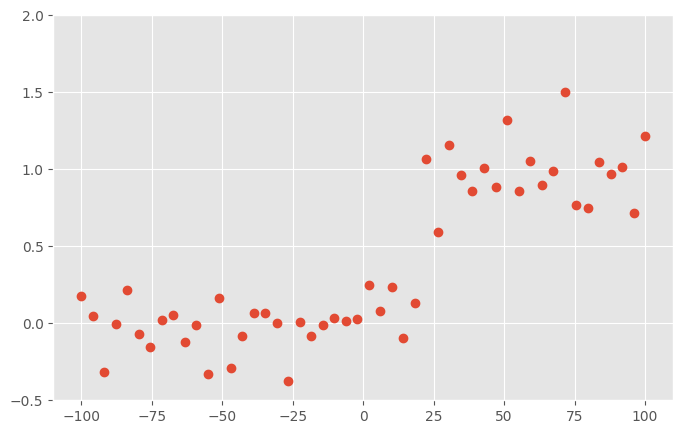

In [6]:
# -- generate a noisy step function
np.random.seed(3597)
xx = np.linspace(-100., 100., 50)
yy = 1.0 * (xx > 20.) + 0.2 * np.random.randn(len(xx))

# -- plot it
fig, ax = plt.subplots()
ax.plot(xx, yy, "o")
ax.set_ylim(-0.5, 2.0)
fig.show()

and apply top-hat and Gaussian filters,

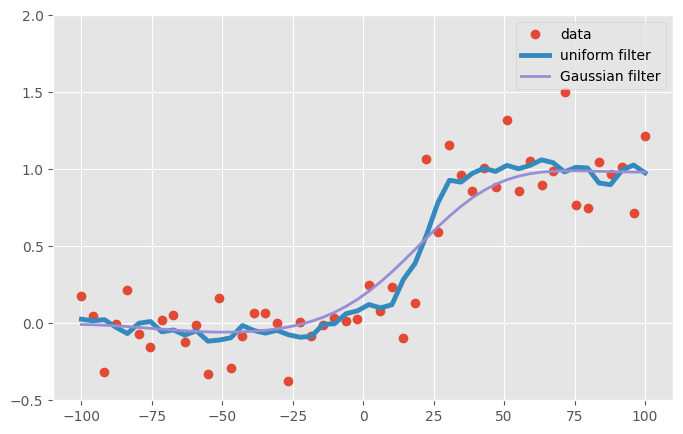

In [13]:
# -- plot uniform and Gaussian filters of the same width
wid = 5

fig, ax = plt.subplots()
ax.plot(xx, yy, 'o', lw=5, label='data')
ax.plot(xx, uf(yy, wid), lw=3.5, label='uniform filter')
ax.plot(xx, gf(yy, wid), lw=2, label='Gaussian filter')
ax.set_ylim(-0.5, 2)
ax.legend()
fig.show()

---

### Filtering 2D and 3D Images

Arrays in 2D can befiltered exactly like arrays in 1D,

In [14]:
# -- reset mpl stylesheet
plt.style.use("default")

# -- set rcParams for MPL so we don't have to type 'interpolation="nearest"'
plt.rcParams["image.cmap"] = "gist_gray"
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["figure.figsize"] = (8, 5)

In [18]:
# -- read in a two dimensional image
fname = "/content/drive/My Drive/cvps20/data/examples/piv_video_cap.jpg"
img = np.asarray(iio.imread(fname)) / 255.

<ipython-input-18-749d23349513>:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = np.asarray(iio.imread(fname)) / 255.


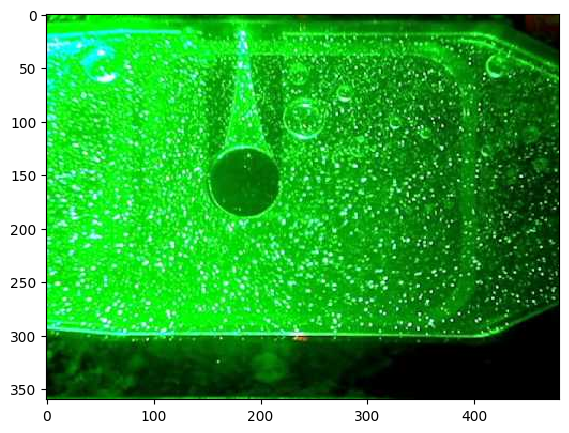

In [19]:
# -- show the image
plt.imshow(img)

In [20]:
# -- create a "luminosity" image
imgL = np.mean(img, axis=2)

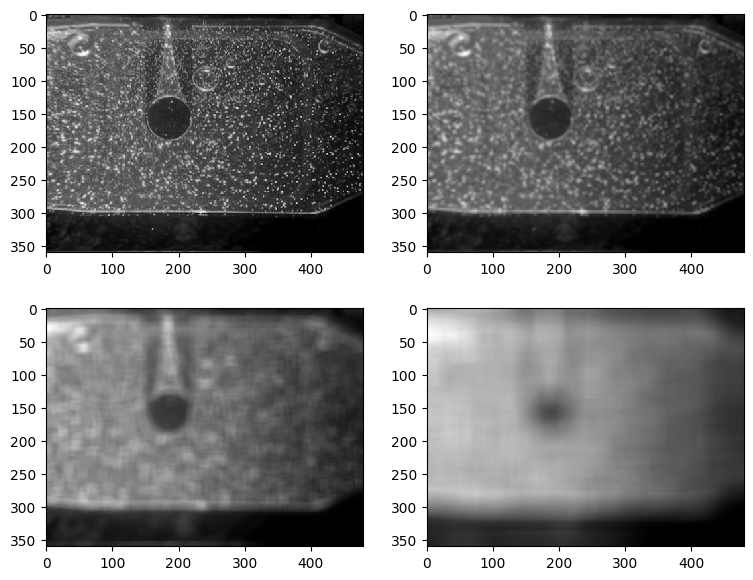

In [21]:
# -- show the image and a uniform filtered version
fig, ax = plt.subplots(2, 2, figsize=(9, 7))

ax[0, 0].imshow(imgL)
ax[0, 1].imshow(uf(imgL, 5))
ax[1, 0].imshow(uf(imgL, 15))
ax[1, 1].imshow(uf(imgL, 45))

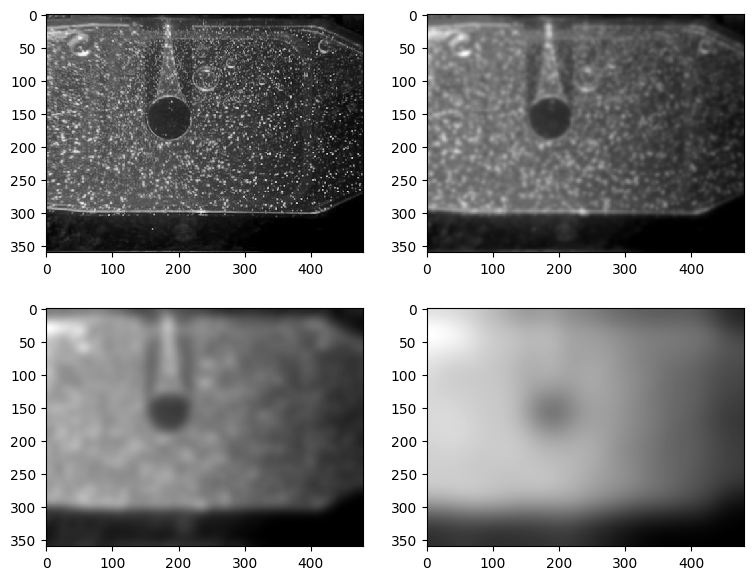

In [22]:
# -- let's compare a uniform and gaussian filter
fig, ax = plt.subplots(2, 2, figsize=(9, 7))

ax[0, 0].imshow(imgL)
ax[0, 1].imshow(gf(imgL, 5/2))
ax[1, 0].imshow(gf(imgL, 15/2))
ax[1, 1].imshow(gf(imgL, 45/2))

Notice, we can smooth the image with a different width in each dimension,

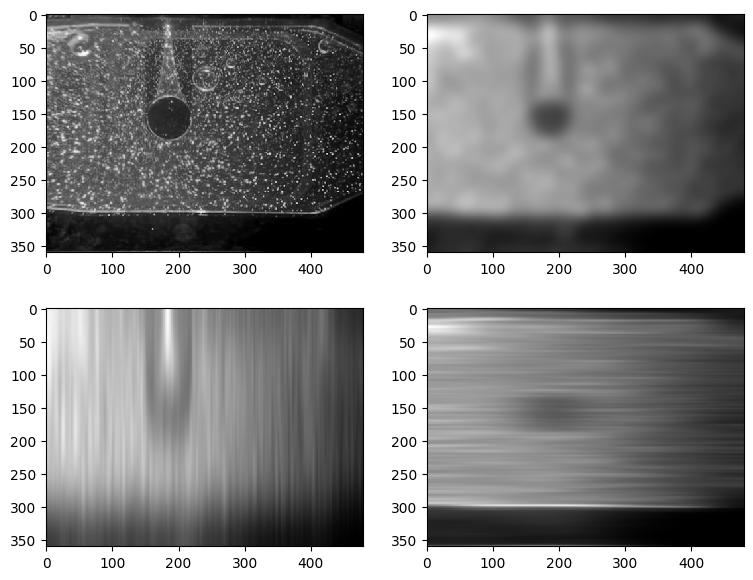

In [24]:
# -- show the image and a uniform filtered version
fig, ax = plt.subplots(2, 2, figsize=(9, 7))

ax[0, 0].imshow(imgL)
ax[0, 1].imshow(gf(imgL, 10))
ax[1, 0].imshow(gf(imgL, (40, 1)))
ax[1, 1].imshow(gf(imgL, (1, 40)))

Let's smooth the 3-color image with a Gaussian filter of width 20.


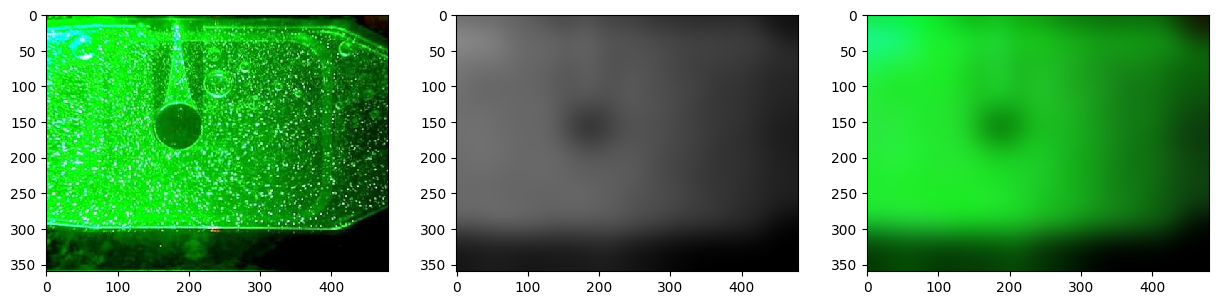

In [26]:
# -- plot the filtered version of the full 3-color image
fig, ax = plt.subplots(1, 3, figsize=(15, 8))

ax[0].imshow(img)
ax[1].imshow(gf(img, 20))
ax[2].imshow(gf(img, (20, 20, 0)))
